In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [2]:
df=pd.read_csv('citrus.csv')

In [3]:
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [4]:
df.tail()

,name,diameter,weight,red,green,blue
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11
9999,grapefruit,16.45,261.51,152,74,2


In [5]:
df.shape

(10000, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
name        10000 non-null object
diameter    10000 non-null float64
weight      10000 non-null float64
red         10000 non-null int64
green       10000 non-null int64
blue        10000 non-null int64
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [7]:
df.dtypes

name         object
diameter    float64
weight      float64
red           int64
green         int64
blue          int64
dtype: object

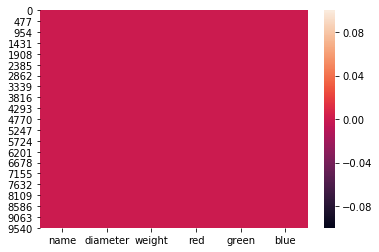

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.duplicated().sum().sum()

0

In [10]:
df.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


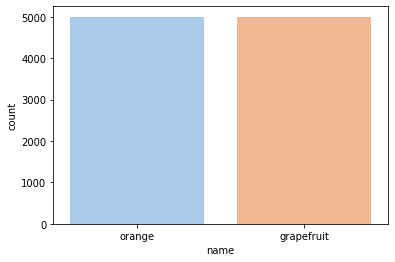

In [11]:
sns.countplot(df.name,palette='pastel')

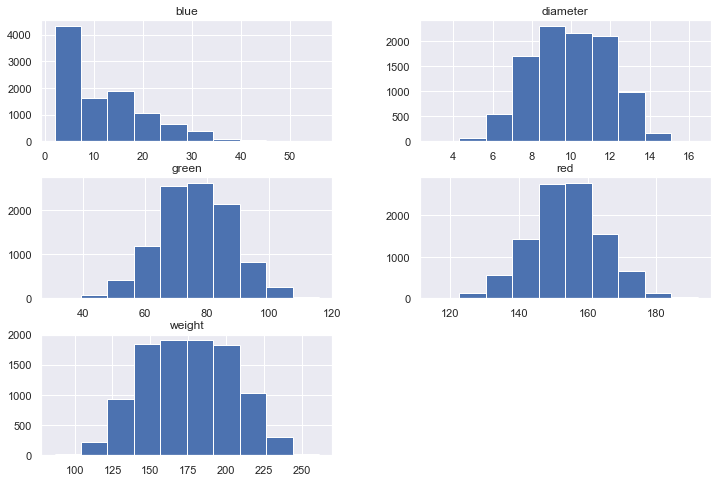

In [12]:
sns.set()
df.hist(figsize=(12,8))
plt.show()

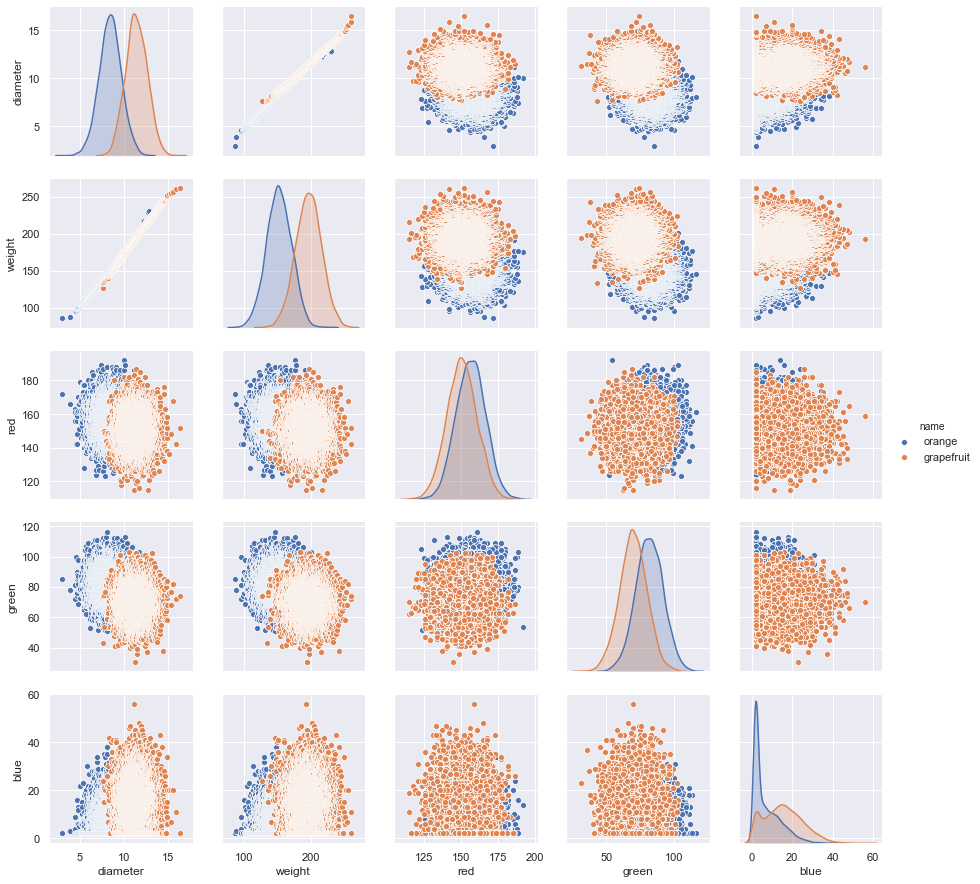

In [13]:
sns.pairplot(df,vars=['diameter','weight','red','green','blue'],hue='name')

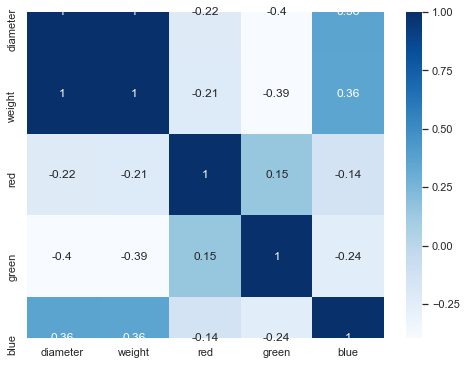

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [15]:
y=df.name
x=df.drop('name',axis=1)
y.shape,x.shape

((10000,), (10000, 5))

In [16]:
y=pd.DataFrame([1 if i =='orange' else 0 for i in df.name],columns=['features'])

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

In [18]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

In [19]:
#Build network model using keras

In [20]:
def create_model():
    model=Sequential()
    model.add(Dense(8,kernel_initializer='uniform',activation='relu',input_dim=xtrain.shape[1]))
    model.add(Dense(4,kernel_initializer='uniform',activation='relu'))
    model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [21]:
estimator=KerasClassifier(build_fn=create_model,epochs=250)
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=0)
scores=cross_val_score(estimator,xtrain,ytrain,cv=kfold)

Epoch 1/250
7199/7199 [==============================] - 1s 192us/step - loss: 0.6137 - accuracy: 0.8578
Epoch 2/250
7199/7199 [==============================] - 0s 63us/step - loss: 0.3994 - accuracy: 0.9185
Epoch 3/250
7199/7199 [==============================] - 0s 47us/step - loss: 0.3425 - accuracy: 0.9255
Epoch 4/250
7199/7199 [==============================] - 0s 69us/step - loss: 0.3108 - accuracy: 0.9258
Epoch 5/250
7199/7199 [==============================] - 1s 73us/step - loss: 0.2881 - accuracy: 0.9265
Epoch 6/250
7199/7199 [==============================] - 0s 49us/step - loss: 0.2704 - accuracy: 0.9262
Epoch 7/250
7199/7199 [==============================] - 0s 65us/step - loss: 0.2564 - accuracy: 0.9264
Epoch 8/250
7199/7199 [==============================] - 1s 81us/step - loss: 0.2451 - accuracy: 0.9274
Epoch 9/250
7199/7199 [==============================] - 0s 63us/step - loss: 0.2358 - accuracy: 0.9267
Epoch 10/250
7199/7199 [==============================] - 0s 48

7199/7199 [==============================] - 0s 62us/step - loss: 0.1165 - accuracy: 0.9611
Epoch 79/250
7199/7199 [==============================] - 0s 54us/step - loss: 0.1162 - accuracy: 0.9612
Epoch 80/250
7199/7199 [==============================] - 1s 85us/step - loss: 0.1161 - accuracy: 0.9633
Epoch 81/250
7199/7199 [==============================] - 1s 76us/step - loss: 0.1154 - accuracy: 0.9632
Epoch 82/250
7199/7199 [==============================] - 0s 52us/step - loss: 0.1145 - accuracy: 0.9640
Epoch 83/250
7199/7199 [==============================] - 1s 99us/step - loss: 0.1130 - accuracy: 0.9649
Epoch 84/250
7199/7199 [==============================] - 0s 51us/step - loss: 0.1116 - accuracy: 0.9637
Epoch 85/250
7199/7199 [==============================] - 0s 48us/step - loss: 0.1106 - accuracy: 0.9643
Epoch 86/250
7199/7199 [==============================] - 1s 85us/step - loss: 0.1090 - accuracy: 0.9657
Epoch 87/250
7199/7199 [==============================] - 0s 62us/st

7199/7199 [==============================] - 1s 97us/step - loss: 0.0851 - accuracy: 0.9729
Epoch 155/250
7199/7199 [==============================] - 0s 68us/step - loss: 0.0850 - accuracy: 0.9721
Epoch 156/250
7199/7199 [==============================] - 0s 69us/step - loss: 0.0846 - accuracy: 0.9729
Epoch 157/250
7199/7199 [==============================] - 1s 84us/step - loss: 0.0854 - accuracy: 0.9717
Epoch 158/250
7199/7199 [==============================] - 0s 57us/step - loss: 0.0851 - accuracy: 0.9722
Epoch 159/250
7199/7199 [==============================] - 0s 59us/step - loss: 0.0844 - accuracy: 0.9722
Epoch 160/250
7199/7199 [==============================] - 1s 113us/step - loss: 0.0844 - accuracy: 0.9719
Epoch 161/250
7199/7199 [==============================] - 0s 51us/step - loss: 0.0843 - accuracy: 0.9725
Epoch 162/250
7199/7199 [==============================] - 0s 58us/step - loss: 0.0845 - accuracy: 0.9725
Epoch 163/250
7199/7199 [==============================] - 

7199/7199 [==============================] - 1s 103us/step - loss: 0.0804 - accuracy: 0.9731
Epoch 231/250
7199/7199 [==============================] - 0s 54us/step - loss: 0.0801 - accuracy: 0.9729
Epoch 232/250
7199/7199 [==============================] - 1s 70us/step - loss: 0.0793 - accuracy: 0.9735
Epoch 233/250
7199/7199 [==============================] - 1s 81us/step - loss: 0.0791 - accuracy: 0.9737
Epoch 234/250
7199/7199 [==============================] - 1s 76us/step - loss: 0.0799 - accuracy: 0.9737
Epoch 235/250
7199/7199 [==============================] - 0s 54us/step - loss: 0.0794 - accuracy: 0.9733
Epoch 236/250
7199/7199 [==============================] - 1s 98us/step - loss: 0.0798 - accuracy: 0.9736
Epoch 237/250
7199/7199 [==============================] - 0s 60us/step - loss: 0.0798 - accuracy: 0.9731
Epoch 238/250
7199/7199 [==============================] - 0s 50us/step - loss: 0.0791 - accuracy: 0.9737
Epoch 239/250
7199/7199 [==============================] - 

7199/7199 [==============================] - 0s 67us/step - loss: 0.1476 - accuracy: 0.9403
Epoch 58/250
7199/7199 [==============================] - 0s 63us/step - loss: 0.1460 - accuracy: 0.9410
Epoch 59/250
7199/7199 [==============================] - 1s 80us/step - loss: 0.1447 - accuracy: 0.9418
Epoch 60/250
7199/7199 [==============================] - 1s 71us/step - loss: 0.1430 - accuracy: 0.9419
Epoch 61/250
7199/7199 [==============================] - 0s 68us/step - loss: 0.1414 - accuracy: 0.9432
Epoch 62/250
7199/7199 [==============================] - 1s 95us/step - loss: 0.1396 - accuracy: 0.9455
Epoch 63/250
7199/7199 [==============================] - 0s 49us/step - loss: 0.1377 - accuracy: 0.9461
Epoch 64/250
7199/7199 [==============================] - 1s 72us/step - loss: 0.1367 - accuracy: 0.9467
Epoch 65/250
7199/7199 [==============================] - 1s 76us/step - loss: 0.1343 - accuracy: 0.9479
Epoch 66/250
7199/7199 [==============================] - 0s 52us/st

7199/7199 [==============================] - 1s 78us/step - loss: 0.1144 - accuracy: 0.9632
Epoch 134/250
7199/7199 [==============================] - 0s 62us/step - loss: 0.1147 - accuracy: 0.9647
Epoch 135/250
7199/7199 [==============================] - 0s 54us/step - loss: 0.1146 - accuracy: 0.9633
Epoch 136/250
7199/7199 [==============================] - 1s 107us/step - loss: 0.1148 - accuracy: 0.9628
Epoch 137/250
7199/7199 [==============================] - 0s 51us/step - loss: 0.1137 - accuracy: 0.9644
Epoch 138/250
7199/7199 [==============================] - 1s 105us/step - loss: 0.1142 - accuracy: 0.9647
Epoch 139/250
7199/7199 [==============================] - 0s 61us/step - loss: 0.1143 - accuracy: 0.9633
Epoch 140/250
7199/7199 [==============================] - 0s 51us/step - loss: 0.1143 - accuracy: 0.9636
Epoch 141/250
7199/7199 [==============================] - 1s 83us/step - loss: 0.1140 - accuracy: 0.9636
Epoch 142/250
7199/7199 [==============================] -

7199/7199 [==============================] - 1s 90us/step - loss: 0.1135 - accuracy: 0.9622
Epoch 210/250
7199/7199 [==============================] - 1s 76us/step - loss: 0.1142 - accuracy: 0.9651
Epoch 211/250
7199/7199 [==============================] - 1s 114us/step - loss: 0.1136 - accuracy: 0.9643
Epoch 212/250
7199/7199 [==============================] - 0s 56us/step - loss: 0.1140 - accuracy: 0.9650
Epoch 213/250
7199/7199 [==============================] - 1s 75us/step - loss: 0.1143 - accuracy: 0.9637
Epoch 214/250
7199/7199 [==============================] - 1s 87us/step - loss: 0.1142 - accuracy: 0.9639
Epoch 215/250
7199/7199 [==============================] - 1s 74us/step - loss: 0.1134 - accuracy: 0.9649
Epoch 216/250
7199/7199 [==============================] - 0s 54us/step - loss: 0.1140 - accuracy: 0.9657
Epoch 217/250
7199/7199 [==============================] - 1s 83us/step - loss: 0.1136 - accuracy: 0.9635
Epoch 218/250
7199/7199 [==============================] - 

7200/7200 [==============================] - 1s 122us/step - loss: 0.1705 - accuracy: 0.93330s - loss: 0.163
Epoch 36/250
7200/7200 [==============================] - 0s 53us/step - loss: 0.1679 - accuracy: 0.9356
Epoch 37/250
7200/7200 [==============================] - 0s 49us/step - loss: 0.1656 - accuracy: 0.9360
Epoch 38/250
7200/7200 [==============================] - 1s 98us/step - loss: 0.1629 - accuracy: 0.9369
Epoch 39/250
7200/7200 [==============================] - 0s 55us/step - loss: 0.1604 - accuracy: 0.9386
Epoch 40/250
7200/7200 [==============================] - 0s 65us/step - loss: 0.1573 - accuracy: 0.9397
Epoch 41/250
7200/7200 [==============================] - 1s 89us/step - loss: 0.1541 - accuracy: 0.9410
Epoch 42/250
7200/7200 [==============================] - 0s 52us/step - loss: 0.1508 - accuracy: 0.9426
Epoch 43/250
7200/7200 [==============================] - 0s 67us/step - loss: 0.1473 - accuracy: 0.9458
Epoch 44/250
7200/7200 [===========================

7200/7200 [==============================] - 1s 96us/step - loss: 0.0662 - accuracy: 0.9771
Epoch 113/250
7200/7200 [==============================] - 0s 56us/step - loss: 0.0656 - accuracy: 0.9769
Epoch 114/250
7200/7200 [==============================] - 1s 86us/step - loss: 0.0650 - accuracy: 0.9775
Epoch 115/250
7200/7200 [==============================] - 1s 87us/step - loss: 0.0647 - accuracy: 0.9781
Epoch 116/250
7200/7200 [==============================] - 0s 54us/step - loss: 0.0652 - accuracy: 0.9768
Epoch 117/250
7200/7200 [==============================] - 0s 58us/step - loss: 0.0646 - accuracy: 0.9778
Epoch 118/250
7200/7200 [==============================] - 1s 76us/step - loss: 0.0640 - accuracy: 0.9778
Epoch 119/250
7200/7200 [==============================] - 1s 74us/step - loss: 0.0642 - accuracy: 0.9772
Epoch 120/250
7200/7200 [==============================] - 0s 49us/step - loss: 0.0640 - accuracy: 0.9779
Epoch 121/250
7200/7200 [==============================] - 0

7200/7200 [==============================] - 1s 85us/step - loss: 0.0535 - accuracy: 0.9803
Epoch 190/250
7200/7200 [==============================] - 0s 65us/step - loss: 0.0530 - accuracy: 0.9810
Epoch 191/250
7200/7200 [==============================] - 1s 81us/step - loss: 0.0528 - accuracy: 0.9811
Epoch 192/250
7200/7200 [==============================] - 0s 63us/step - loss: 0.0531 - accuracy: 0.9801 0s - loss: 0.0505 - accura
Epoch 193/250
7200/7200 [==============================] - 0s 48us/step - loss: 0.0528 - accuracy: 0.9811
Epoch 194/250
7200/7200 [==============================] - 1s 87us/step - loss: 0.0525 - accuracy: 0.9804
Epoch 195/250
7200/7200 [==============================] - 1s 78us/step - loss: 0.0521 - accuracy: 0.9808
Epoch 196/250
7200/7200 [==============================] - 0s 50us/step - loss: 0.0525 - accuracy: 0.9806
Epoch 197/250
7200/7200 [==============================] - 1s 76us/step - loss: 0.0522 - accuracy: 0.9812
Epoch 198/250
7200/7200 [========

7200/7200 [==============================] - 1s 103us/step - loss: 0.1750 - accuracy: 0.9281
Epoch 16/250
7200/7200 [==============================] - 0s 51us/step - loss: 0.1750 - accuracy: 0.9287
Epoch 17/250
7200/7200 [==============================] - 0s 63us/step - loss: 0.1747 - accuracy: 0.9287
Epoch 18/250
7200/7200 [==============================] - 1s 87us/step - loss: 0.1742 - accuracy: 0.9290
Epoch 19/250
7200/7200 [==============================] - 0s 67us/step - loss: 0.1739 - accuracy: 0.9283
Epoch 20/250
7200/7200 [==============================] - 0s 51us/step - loss: 0.1737 - accuracy: 0.9297
Epoch 21/250
7200/7200 [==============================] - 1s 73us/step - loss: 0.1736 - accuracy: 0.9287
Epoch 22/250
7200/7200 [==============================] - 1s 87us/step - loss: 0.1732 - accuracy: 0.9299
Epoch 23/250
7200/7200 [==============================] - 0s 50us/step - loss: 0.1728 - accuracy: 0.9289
Epoch 24/250
7200/7200 [==============================] - 1s 100us/

7200/7200 [==============================] - 0s 65us/step - loss: 0.1168 - accuracy: 0.9614
Epoch 94/250
7200/7200 [==============================] - 0s 56us/step - loss: 0.1170 - accuracy: 0.9619
Epoch 95/250
7200/7200 [==============================] - 1s 90us/step - loss: 0.1163 - accuracy: 0.9617
Epoch 96/250
7200/7200 [==============================] - 0s 51us/step - loss: 0.1172 - accuracy: 0.9611
Epoch 97/250
7200/7200 [==============================] - 0s 54us/step - loss: 0.1164 - accuracy: 0.9610
Epoch 98/250
7200/7200 [==============================] - 1s 90us/step - loss: 0.1160 - accuracy: 0.9631
Epoch 99/250
7200/7200 [==============================] - 0s 65us/step - loss: 0.1163 - accuracy: 0.9626
Epoch 100/250
7200/7200 [==============================] - 0s 65us/step - loss: 0.1161 - accuracy: 0.9638
Epoch 101/250
7200/7200 [==============================] - 1s 88us/step - loss: 0.1158 - accuracy: 0.9625
Epoch 102/250
7200/7200 [==============================] - 0s 56us

7200/7200 [==============================] - 0s 59us/step - loss: 0.1156 - accuracy: 0.9626
Epoch 171/250
7200/7200 [==============================] - 1s 80us/step - loss: 0.1163 - accuracy: 0.9636
Epoch 172/250
7200/7200 [==============================] - 1s 88us/step - loss: 0.1153 - accuracy: 0.9640
Epoch 173/250
7200/7200 [==============================] - 1s 70us/step - loss: 0.1150 - accuracy: 0.9644
Epoch 174/250
7200/7200 [==============================] - 1s 118us/step - loss: 0.1154 - accuracy: 0.9631
Epoch 175/250
7200/7200 [==============================] - 0s 66us/step - loss: 0.1163 - accuracy: 0.9639
Epoch 176/250
7200/7200 [==============================] - 1s 102us/step - loss: 0.1157 - accuracy: 0.9632
Epoch 177/250
7200/7200 [==============================] - 1s 75us/step - loss: 0.1158 - accuracy: 0.9631
Epoch 178/250
7200/7200 [==============================] - 1s 70us/step - loss: 0.1149 - accuracy: 0.9639
Epoch 179/250
7200/7200 [==============================] -

7200/7200 [==============================] - 0s 67us/step - loss: 0.0973 - accuracy: 0.9688
Epoch 247/250
7200/7200 [==============================] - 1s 90us/step - loss: 0.0971 - accuracy: 0.9690
Epoch 248/250
7200/7200 [==============================] - 1s 73us/step - loss: 0.0955 - accuracy: 0.9697
Epoch 249/250
7200/7200 [==============================] - 1s 70us/step - loss: 0.0949 - accuracy: 0.9699
Epoch 250/250
800/800 [==============================] - 0s 371us/step
Epoch 1/250
7200/7200 [==============================] - 2s 221us/step - loss: 0.5975 - accuracy: 0.8324
Epoch 2/250
7200/7200 [==============================] - 0s 69us/step - loss: 0.2306 - accuracy: 0.9260
Epoch 3/250
7200/7200 [==============================] - 1s 83us/step - loss: 0.1845 - accuracy: 0.9274
Epoch 4/250
7200/7200 [==============================] - 0s 64us/step - loss: 0.1819 - accuracy: 0.9265
Epoch 5/250
7200/7200 [==============================] - 0s 54us/step - loss: 0.1813 - accuracy: 0.928

7200/7200 [==============================] - 1s 100us/step - loss: 0.1343 - accuracy: 0.9494
Epoch 74/250
7200/7200 [==============================] - 0s 52us/step - loss: 0.1328 - accuracy: 0.9511
Epoch 75/250
7200/7200 [==============================] - 1s 72us/step - loss: 0.1317 - accuracy: 0.9517
Epoch 76/250
7200/7200 [==============================] - 1s 78us/step - loss: 0.1304 - accuracy: 0.9535
Epoch 77/250
7200/7200 [==============================] - 0s 61us/step - loss: 0.1291 - accuracy: 0.9526
Epoch 78/250
7200/7200 [==============================] - 0s 51us/step - loss: 0.1281 - accuracy: 0.9546
Epoch 79/250
7200/7200 [==============================] - 1s 86us/step - loss: 0.1270 - accuracy: 0.9547
Epoch 80/250
7200/7200 [==============================] - 1s 72us/step - loss: 0.1262 - accuracy: 0.9547
Epoch 81/250
7200/7200 [==============================] - 0s 54us/step - loss: 0.1249 - accuracy: 0.9568
Epoch 82/250
7200/7200 [==============================] - 1s 111us/

7200/7200 [==============================] - 1s 76us/step - loss: 0.1155 - accuracy: 0.9646
Epoch 151/250
7200/7200 [==============================] - 0s 63us/step - loss: 0.1152 - accuracy: 0.9649
Epoch 152/250
7200/7200 [==============================] - 0s 50us/step - loss: 0.1154 - accuracy: 0.9644
Epoch 153/250
7200/7200 [==============================] - 1s 96us/step - loss: 0.1157 - accuracy: 0.9631
Epoch 154/250
7200/7200 [==============================] - 0s 50us/step - loss: 0.1158 - accuracy: 0.9650
Epoch 155/250
7200/7200 [==============================] - 0s 50us/step - loss: 0.1153 - accuracy: 0.9656
Epoch 156/250
7200/7200 [==============================] - 1s 81us/step - loss: 0.1156 - accuracy: 0.9638
Epoch 157/250
7200/7200 [==============================] - 1s 76us/step - loss: 0.1157 - accuracy: 0.9647
Epoch 158/250
7200/7200 [==============================] - 0s 60us/step - loss: 0.1149 - accuracy: 0.9661
Epoch 159/250
7200/7200 [==============================] - 1

7200/7200 [==============================] - 0s 62us/step - loss: 0.1024 - accuracy: 0.9690
Epoch 228/250
7200/7200 [==============================] - 1s 97us/step - loss: 0.1024 - accuracy: 0.9688
Epoch 229/250
7200/7200 [==============================] - 0s 57us/step - loss: 0.1018 - accuracy: 0.9689
Epoch 230/250
7200/7200 [==============================] - 0s 54us/step - loss: 0.1015 - accuracy: 0.9685
Epoch 231/250
7200/7200 [==============================] - 0s 65us/step - loss: 0.1010 - accuracy: 0.9688
Epoch 232/250
7200/7200 [==============================] - 1s 84us/step - loss: 0.1011 - accuracy: 0.9686
Epoch 233/250
7200/7200 [==============================] - 0s 51us/step - loss: 0.1004 - accuracy: 0.9681
Epoch 234/250
7200/7200 [==============================] - 0s 52us/step - loss: 0.0997 - accuracy: 0.9694
Epoch 235/250
7200/7200 [==============================] - 1s 96us/step - loss: 0.0997 - accuracy: 0.9685
Epoch 236/250
7200/7200 [==============================] - 0

7200/7200 [==============================] - 1s 91us/step - loss: 0.1549 - accuracy: 0.9374
Epoch 55/250
7200/7200 [==============================] - 1s 85us/step - loss: 0.1533 - accuracy: 0.9381
Epoch 56/250
7200/7200 [==============================] - 0s 54us/step - loss: 0.1514 - accuracy: 0.9385
Epoch 57/250
7200/7200 [==============================] - 1s 106us/step - loss: 0.1502 - accuracy: 0.9393
Epoch 58/250
7200/7200 [==============================] - 0s 54us/step - loss: 0.1479 - accuracy: 0.9407
Epoch 59/250
7200/7200 [==============================] - 0s 51us/step - loss: 0.1457 - accuracy: 0.9417
Epoch 60/250
7200/7200 [==============================] - 1s 82us/step - loss: 0.1438 - accuracy: 0.9433
Epoch 61/250
7200/7200 [==============================] - 1s 74us/step - loss: 0.1411 - accuracy: 0.9435
Epoch 62/250
7200/7200 [==============================] - 0s 65us/step - loss: 0.1389 - accuracy: 0.9457
Epoch 63/250
7200/7200 [==============================] - 1s 72us/s

7200/7200 [==============================] - 0s 65us/step - loss: 0.0830 - accuracy: 0.9731
Epoch 132/250
7200/7200 [==============================] - 1s 93us/step - loss: 0.0819 - accuracy: 0.9737
Epoch 133/250
7200/7200 [==============================] - 0s 65us/step - loss: 0.0815 - accuracy: 0.9735
Epoch 134/250
7200/7200 [==============================] - 1s 70us/step - loss: 0.0810 - accuracy: 0.9736
Epoch 135/250
7200/7200 [==============================] - 1s 88us/step - loss: 0.0811 - accuracy: 0.9739
Epoch 136/250
7200/7200 [==============================] - 0s 53us/step - loss: 0.0808 - accuracy: 0.9737
Epoch 137/250
7200/7200 [==============================] - 1s 92us/step - loss: 0.0807 - accuracy: 0.9736
Epoch 138/250
7200/7200 [==============================] - 0s 61us/step - loss: 0.0808 - accuracy: 0.9737
Epoch 139/250
7200/7200 [==============================] - 0s 54us/step - loss: 0.0802 - accuracy: 0.9742
Epoch 140/250
7200/7200 [==============================] - 1

7200/7200 [==============================] - 0s 67us/step - loss: 0.0650 - accuracy: 0.9775
Epoch 208/250
7200/7200 [==============================] - 1s 81us/step - loss: 0.0637 - accuracy: 0.9775
Epoch 209/250
7200/7200 [==============================] - 1s 71us/step - loss: 0.0627 - accuracy: 0.9776
Epoch 210/250
7200/7200 [==============================] - 0s 67us/step - loss: 0.0619 - accuracy: 0.9769
Epoch 211/250
7200/7200 [==============================] - 0s 68us/step - loss: 0.0614 - accuracy: 0.9775
Epoch 212/250
7200/7200 [==============================] - 1s 108us/step - loss: 0.0606 - accuracy: 0.9774
Epoch 213/250
7200/7200 [==============================] - 0s 53us/step - loss: 0.0591 - accuracy: 0.9789
Epoch 214/250
7200/7200 [==============================] - 0s 54us/step - loss: 0.0571 - accuracy: 0.9789
Epoch 215/250
7200/7200 [==============================] - 1s 92us/step - loss: 0.0582 - accuracy: 0.9785
Epoch 216/250
7200/7200 [==============================] - 

7200/7200 [==============================] - 0s 54us/step - loss: 0.1727 - accuracy: 0.9296 0s - loss: 0.1755 - accuracy: 0.
Epoch 34/250
7200/7200 [==============================] - 1s 92us/step - loss: 0.1722 - accuracy: 0.9293
Epoch 35/250
7200/7200 [==============================] - 0s 56us/step - loss: 0.1720 - accuracy: 0.9311
Epoch 36/250
7200/7200 [==============================] - 0s 52us/step - loss: 0.1714 - accuracy: 0.9301
Epoch 37/250
7200/7200 [==============================] - 1s 97us/step - loss: 0.1708 - accuracy: 0.9308
Epoch 38/250
7200/7200 [==============================] - 0s 52us/step - loss: 0.1706 - accuracy: 0.9306
Epoch 39/250
7200/7200 [==============================] - 0s 50us/step - loss: 0.1700 - accuracy: 0.9311
Epoch 40/250
7200/7200 [==============================] - 1s 103us/step - loss: 0.1694 - accuracy: 0.9319
Epoch 41/250
7200/7200 [==============================] - 0s 62us/step - loss: 0.1688 - accuracy: 0.9317
Epoch 42/250
7200/7200 [==========

7200/7200 [==============================] - 1s 72us/step - loss: 0.1150 - accuracy: 0.9649
Epoch 111/250
7200/7200 [==============================] - 1s 75us/step - loss: 0.1158 - accuracy: 0.9640
Epoch 112/250
7200/7200 [==============================] - 0s 65us/step - loss: 0.1151 - accuracy: 0.9647
Epoch 113/250
7200/7200 [==============================] - 1s 80us/step - loss: 0.1163 - accuracy: 0.9617
Epoch 114/250
7200/7200 [==============================] - 1s 72us/step - loss: 0.1155 - accuracy: 0.9640
Epoch 115/250
7200/7200 [==============================] - 0s 62us/step - loss: 0.1157 - accuracy: 0.9639
Epoch 116/250
7200/7200 [==============================] - 0s 59us/step - loss: 0.1151 - accuracy: 0.9635
Epoch 117/250
7200/7200 [==============================] - 1s 98us/step - loss: 0.1158 - accuracy: 0.9639
Epoch 118/250
7200/7200 [==============================] - 1s 86us/step - loss: 0.1157 - accuracy: 0.9651
Epoch 119/250
7200/7200 [==============================] - 1

7200/7200 [==============================] - 0s 67us/step - loss: 0.1151 - accuracy: 0.9644
Epoch 187/250
7200/7200 [==============================] - 0s 55us/step - loss: 0.1149 - accuracy: 0.9649
Epoch 188/250
7200/7200 [==============================] - 1s 115us/step - loss: 0.1152 - accuracy: 0.9644
Epoch 189/250
7200/7200 [==============================] - 0s 54us/step - loss: 0.1143 - accuracy: 0.9649
Epoch 190/250
7200/7200 [==============================] - 1s 74us/step - loss: 0.1145 - accuracy: 0.9633
Epoch 191/250
7200/7200 [==============================] - 1s 91us/step - loss: 0.1149 - accuracy: 0.9654
Epoch 192/250
7200/7200 [==============================] - 1s 75us/step - loss: 0.1152 - accuracy: 0.9657
Epoch 193/250
7200/7200 [==============================] - 0s 65us/step - loss: 0.1144 - accuracy: 0.9644
Epoch 194/250
7200/7200 [==============================] - 1s 103us/step - loss: 0.1148 - accuracy: 0.9650
Epoch 195/250
7200/7200 [==============================] -

7200/7200 [==============================] - 0s 61us/step - loss: 0.2186 - accuracy: 0.9265
Epoch 13/250
7200/7200 [==============================] - 1s 78us/step - loss: 0.2136 - accuracy: 0.9268
Epoch 14/250
7200/7200 [==============================] - 0s 65us/step - loss: 0.2093 - accuracy: 0.9275
Epoch 15/250
7200/7200 [==============================] - 0s 69us/step - loss: 0.2056 - accuracy: 0.9262
Epoch 16/250
7200/7200 [==============================] - 1s 130us/step - loss: 0.2024 - accuracy: 0.92680s - los
Epoch 17/250
7200/7200 [==============================] - 0s 56us/step - loss: 0.1995 - accuracy: 0.9262
Epoch 18/250
7200/7200 [==============================] - 0s 58us/step - loss: 0.1972 - accuracy: 0.9265
Epoch 19/250
7200/7200 [==============================] - 1s 93us/step - loss: 0.1948 - accuracy: 0.9275
Epoch 20/250
7200/7200 [==============================] - 0s 63us/step - loss: 0.1930 - accuracy: 0.9272
Epoch 21/250
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 67us/step - loss: 0.1175 - accuracy: 0.9629
Epoch 91/250
7200/7200 [==============================] - 0s 64us/step - loss: 0.1169 - accuracy: 0.9615
Epoch 92/250
7200/7200 [==============================] - 0s 61us/step - loss: 0.1174 - accuracy: 0.9628
Epoch 93/250
7200/7200 [==============================] - 1s 85us/step - loss: 0.1170 - accuracy: 0.9629
Epoch 94/250
7200/7200 [==============================] - 0s 54us/step - loss: 0.1164 - accuracy: 0.9622
Epoch 95/250
7200/7200 [==============================] - 0s 56us/step - loss: 0.1159 - accuracy: 0.9624
Epoch 96/250
7200/7200 [==============================] - 1s 128us/step - loss: 0.1145 - accuracy: 0.9628
Epoch 97/250
7200/7200 [==============================] - 0s 51us/step - loss: 0.1147 - accuracy: 0.9631
Epoch 98/250
7200/7200 [==============================] - 1s 115us/step - loss: 0.1139 - accuracy: 0.9642
Epoch 99/250
7200/7200 [==============================] - 1s 97us/

7200/7200 [==============================] - 1s 85us/step - loss: 0.0856 - accuracy: 0.9722
Epoch 167/250
7200/7200 [==============================] - 0s 63us/step - loss: 0.0859 - accuracy: 0.9710
Epoch 168/250
7200/7200 [==============================] - 0s 53us/step - loss: 0.0852 - accuracy: 0.9726
Epoch 169/250
7200/7200 [==============================] - 1s 73us/step - loss: 0.0855 - accuracy: 0.9714
Epoch 170/250
7200/7200 [==============================] - 1s 86us/step - loss: 0.0850 - accuracy: 0.9724
Epoch 171/250
7200/7200 [==============================] - 1s 76us/step - loss: 0.0847 - accuracy: 0.9722
Epoch 172/250
7200/7200 [==============================] - 0s 65us/step - loss: 0.0847 - accuracy: 0.9728
Epoch 173/250
7200/7200 [==============================] - 1s 85us/step - loss: 0.0849 - accuracy: 0.9722
Epoch 174/250
7200/7200 [==============================] - 0s 52us/step - loss: 0.0845 - accuracy: 0.9729
Epoch 175/250
7200/7200 [==============================] - 0

7200/7200 [==============================] - 1s 78us/step - loss: 0.0793 - accuracy: 0.9740
Epoch 244/250
7200/7200 [==============================] - 1s 73us/step - loss: 0.0796 - accuracy: 0.9733
Epoch 245/250
7200/7200 [==============================] - 1s 104us/step - loss: 0.0794 - accuracy: 0.9733
Epoch 246/250
7200/7200 [==============================] - 1s 90us/step - loss: 0.0802 - accuracy: 0.9731
Epoch 247/250
7200/7200 [==============================] - 1s 96us/step - loss: 0.0797 - accuracy: 0.9740
Epoch 248/250
7200/7200 [==============================] - 1s 81us/step - loss: 0.0799 - accuracy: 0.9732
Epoch 249/250
7200/7200 [==============================] - 1s 81us/step - loss: 0.0799 - accuracy: 0.9736
Epoch 250/250
800/800 [==============================] - 0s 228us/step
Epoch 1/250
7201/7201 [==============================] - 2s 258us/step - loss: 0.5649 - accuracy: 0.8028
Epoch 2/250
7201/7201 [==============================] - 1s 74us/step - loss: 0.2432 - accuracy

7201/7201 [==============================] - 1s 98us/step - loss: 0.1393 - accuracy: 0.9485
Epoch 71/250
7201/7201 [==============================] - 0s 59us/step - loss: 0.1379 - accuracy: 0.9481
Epoch 72/250
7201/7201 [==============================] - 1s 115us/step - loss: 0.1362 - accuracy: 0.9486
Epoch 73/250
7201/7201 [==============================] - 1s 71us/step - loss: 0.1345 - accuracy: 0.9485
Epoch 74/250
7201/7201 [==============================] - 1s 84us/step - loss: 0.1329 - accuracy: 0.9501
Epoch 75/250
7201/7201 [==============================] - 1s 95us/step - loss: 0.1315 - accuracy: 0.9515
Epoch 76/250
7201/7201 [==============================] - 1s 94us/step - loss: 0.1296 - accuracy: 0.9528
Epoch 77/250
7201/7201 [==============================] - 1s 93us/step - loss: 0.1286 - accuracy: 0.9526
Epoch 78/250
7201/7201 [==============================] - 0s 65us/step - loss: 0.1278 - accuracy: 0.9540
Epoch 79/250
7201/7201 [==============================] - 0s 50us/s

7201/7201 [==============================] - 1s 74us/step - loss: 0.1006 - accuracy: 0.9694
Epoch 148/250
7201/7201 [==============================] - 0s 65us/step - loss: 0.1015 - accuracy: 0.9706
Epoch 149/250
7201/7201 [==============================] - 1s 100us/step - loss: 0.1005 - accuracy: 0.9697
Epoch 150/250
7201/7201 [==============================] - 0s 59us/step - loss: 0.1007 - accuracy: 0.9688
Epoch 151/250
7201/7201 [==============================] - 0s 52us/step - loss: 0.1009 - accuracy: 0.9692
Epoch 152/250
7201/7201 [==============================] - 1s 77us/step - loss: 0.1013 - accuracy: 0.9708
Epoch 153/250
7201/7201 [==============================] - 1s 72us/step - loss: 0.1004 - accuracy: 0.9701
Epoch 154/250
7201/7201 [==============================] - 0s 63us/step - loss: 0.1003 - accuracy: 0.9707
Epoch 155/250
7201/7201 [==============================] - 0s 51us/step - loss: 0.1003 - accuracy: 0.9697
Epoch 156/250
7201/7201 [==============================] - 

7201/7201 [==============================] - 0s 55us/step - loss: 0.0753 - accuracy: 0.9750
Epoch 225/250
7201/7201 [==============================] - 1s 88us/step - loss: 0.0745 - accuracy: 0.9756
Epoch 226/250
7201/7201 [==============================] - 1s 73us/step - loss: 0.0739 - accuracy: 0.9765
Epoch 227/250
7201/7201 [==============================] - 1s 81us/step - loss: 0.0735 - accuracy: 0.9761
Epoch 228/250
7201/7201 [==============================] - 1s 76us/step - loss: 0.0730 - accuracy: 0.9757
Epoch 229/250
7201/7201 [==============================] - 1s 79us/step - loss: 0.0724 - accuracy: 0.9756
Epoch 230/250
7201/7201 [==============================] - 0s 52us/step - loss: 0.0721 - accuracy: 0.9769
Epoch 231/250
7201/7201 [==============================] - 0s 69us/step - loss: 0.0719 - accuracy: 0.9750
Epoch 232/250
7201/7201 [==============================] - 1s 82us/step - loss: 0.0714 - accuracy: 0.9767
Epoch 233/250
7201/7201 [==============================] - 0

Epoch 50/250
7201/7201 [==============================] - 1s 96us/step - loss: 0.1646 - accuracy: 0.9340
Epoch 51/250
7201/7201 [==============================] - 0s 56us/step - loss: 0.1643 - accuracy: 0.9335
Epoch 52/250
7201/7201 [==============================] - 1s 73us/step - loss: 0.1637 - accuracy: 0.9335
Epoch 53/250
7201/7201 [==============================] - 1s 79us/step - loss: 0.1631 - accuracy: 0.9332
Epoch 54/250
7201/7201 [==============================] - 0s 65us/step - loss: 0.1623 - accuracy: 0.9339
Epoch 55/250
7201/7201 [==============================] - 0s 55us/step - loss: 0.1618 - accuracy: 0.9358
Epoch 56/250
7201/7201 [==============================] - 1s 83us/step - loss: 0.1609 - accuracy: 0.9351
Epoch 57/250
7201/7201 [==============================] - 1s 70us/step - loss: 0.1604 - accuracy: 0.9351
Epoch 58/250
7201/7201 [==============================] - 0s 58us/step - loss: 0.1594 - accuracy: 0.9356
Epoch 59/250
7201/7201 [==============================]

7201/7201 [==============================] - 1s 79us/step - loss: 0.1176 - accuracy: 0.9629
Epoch 128/250
7201/7201 [==============================] - 1s 85us/step - loss: 0.1179 - accuracy: 0.9622
Epoch 129/250
7201/7201 [==============================] - 0s 63us/step - loss: 0.1177 - accuracy: 0.9635
Epoch 130/250
7201/7201 [==============================] - 1s 83us/step - loss: 0.1177 - accuracy: 0.9632 0s - loss: 0.1218 - accura
Epoch 131/250
7201/7201 [==============================] - 0s 69us/step - loss: 0.1175 - accuracy: 0.9619
Epoch 132/250
7201/7201 [==============================] - 0s 59us/step - loss: 0.1171 - accuracy: 0.9640
Epoch 133/250
7201/7201 [==============================] - 1s 79us/step - loss: 0.1179 - accuracy: 0.9629 0s - loss: 0.1173 - accuracy: 
Epoch 134/250
7201/7201 [==============================] - 0s 66us/step - loss: 0.1175 - accuracy: 0.9625
Epoch 135/250
7201/7201 [==============================] - 0s 64us/step - loss: 0.1176 - accuracy: 0.9631
Ep

7201/7201 [==============================] - 0s 60us/step - loss: 0.1193 - accuracy: 0.9638
Epoch 204/250
7201/7201 [==============================] - 0s 52us/step - loss: 0.1172 - accuracy: 0.9622
Epoch 205/250
7201/7201 [==============================] - 1s 102us/step - loss: 0.1173 - accuracy: 0.9631
Epoch 206/250
7201/7201 [==============================] - 0s 54us/step - loss: 0.1171 - accuracy: 0.9629
Epoch 207/250
7201/7201 [==============================] - 0s 65us/step - loss: 0.1174 - accuracy: 0.9635
Epoch 208/250
7201/7201 [==============================] - 1s 80us/step - loss: 0.1179 - accuracy: 0.9625
Epoch 209/250
7201/7201 [==============================] - 1s 77us/step - loss: 0.1173 - accuracy: 0.9640 0s - loss: 0.1148 - accura
Epoch 210/250
7201/7201 [==============================] - 0s 61us/step - loss: 0.1176 - accuracy: 0.9628
Epoch 211/250
7201/7201 [==============================] - 1s 97us/step - loss: 0.1176 - accuracy: 0.9643
Epoch 212/250
7201/7201 [=======

In [22]:
print('Accuracy Mean ' +str(scores.mean()))

Accuracy Mean 0.972750449180603


In [23]:
estimator.fit(xtrain,ytrain,batch_size=10, epochs=100,verbose=1)

Epoch 1/100
8000/8000 [==============================] - 3s 321us/step - loss: 0.3346 - accuracy: 0.9103
Epoch 2/100
8000/8000 [==============================] - 2s 226us/step - loss: 0.1818 - accuracy: 0.9270
Epoch 3/100
8000/8000 [==============================] - 2s 217us/step - loss: 0.1807 - accuracy: 0.9275
Epoch 4/100
8000/8000 [==============================] - 2s 212us/step - loss: 0.1800 - accuracy: 0.9261
Epoch 5/100
8000/8000 [==============================] - 2s 209us/step - loss: 0.1793 - accuracy: 0.9271
Epoch 6/100
8000/8000 [==============================] - 2s 245us/step - loss: 0.1787 - accuracy: 0.9269
Epoch 7/100
8000/8000 [==============================] - 2s 217us/step - loss: 0.1783 - accuracy: 0.9275
Epoch 8/100
8000/8000 [==============================] - 2s 229us/step - loss: 0.1776 - accuracy: 0.9280
Epoch 9/100
8000/8000 [==============================] - 2s 206us/step - loss: 0.1776 - accuracy: 0.9276
Epoch 10/100
8000/8000 [==============================]

8000/8000 [==============================] - 2s 267us/step - loss: 0.0988 - accuracy: 0.9679
Epoch 79/100
8000/8000 [==============================] - 2s 220us/step - loss: 0.0980 - accuracy: 0.9684
Epoch 80/100
8000/8000 [==============================] - 2s 223us/step - loss: 0.0977 - accuracy: 0.9682
Epoch 81/100
8000/8000 [==============================] - 2s 240us/step - loss: 0.0973 - accuracy: 0.9679
Epoch 82/100
8000/8000 [==============================] - 2s 198us/step - loss: 0.0962 - accuracy: 0.9681
Epoch 83/100
8000/8000 [==============================] - 2s 214us/step - loss: 0.0956 - accuracy: 0.9694
Epoch 84/100
8000/8000 [==============================] - 2s 201us/step - loss: 0.0952 - accuracy: 0.9691
Epoch 85/100
8000/8000 [==============================] - 2s 206us/step - loss: 0.0948 - accuracy: 0.96820s - loss: 0.0948 - 
Epoch 86/100
8000/8000 [==============================] - 2s 210us/step - loss: 0.0943 - accuracy: 0.9694
Epoch 87/100
8000/8000 [===============

In [24]:
pred=estimator.predict(xtest)

In [25]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       988
           1       0.99      0.94      0.97      1012

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



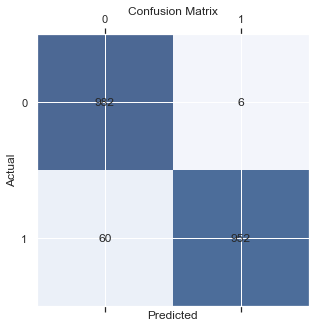

In [27]:
cm=confusion_matrix(ytest,pred)
fig,ax=plt.subplots(figsize=(5,5))
ax.matshow(cm,cmap=plt.cm.Blues,alpha=0.7)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j,y=i,s=cm[i,j],va='center',ha='center')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()